# 图像特效-Gamma校正（指数变换）

In [2]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
src = cv2.cvtColor(cv2.imread('../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [14]:
def gamma_correction(src,gamma=2.4):
#     srcf = np.float32(src)
    dst = np.zeros_like(src)
    lut = np.zeros((256,))
    if gamma < 0.1:
        gamma = -0.1
    if gamma > 5.0:
        gamma = 5.0
        
    for i in range(256):
        lut[i] = ((i / 255.0) ** gamma) * 255.0
    lut = np.uint8(lut)
    if len(src.shape) > 2:
        dst[:,:,0] = cv2.LUT(src[:,:,0],lut)
        dst[:,:,1] = cv2.LUT(src[:,:,1],lut)
        dst[:,:,2] = cv2.LUT(src[:,:,2],lut)
    else:
        dst = cv2.LUT(src,lut)
    return cv2.convertScaleAbs(dst)

In [15]:
dst = gamma_correction(src)

Text(0.5,1,'Gamma:gamma = 2.4')

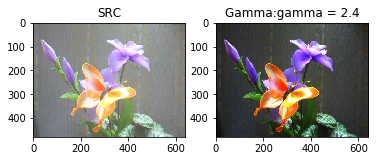

In [16]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Gamma:gamma = 2.4')